* # TPS_Feb_2022_EDA & Classifier(RandomForest & ExtraTree) add ExtraTree+Bagging:bug fixed.Sory about that..😅
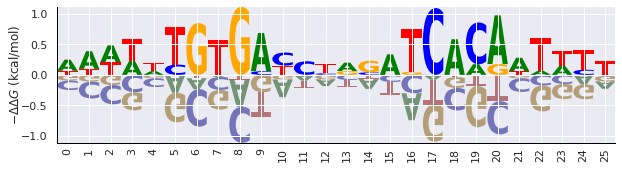 *DNA Sequence BY logomaker*


**🧬DNA** : Deoxyribonucleic acid(DNA) is a molecule compose of two polynucleotide chains.

*  A : adenin
*  C : cytosine
*  G : guanine
*  T : thymine
* the base paring rules (A with T and C with G)
* DNA Sequences (randomly broken into 10-base lengths ) e.g. *ATGCTTATTGGCACC
*  the block optical content (BOC)
* BOC reads are written in the form AwTxGyCz where 0 ≤ w,x,y,z ≤ k, and w + x + y + z = k.
* the fractional base composition (FBC)
* Generating Sequence-Specific FBC Spectrum
> * e.g. Break into every possible 10mer -> A,T,G,C% calculated ---> 10mers binned
> * ATGCTTATTG -> A2T5G2C1 ---> A2T5G2C1
> * TGCTTATTGG -> A1T5G3C1 ---> A1T5G3C1
> * GCTTATTGGC -> A2T5G2C1 ---> A2T5G2C1
> * CTTATTGGCA -> A2T4G2C2 ---> A2T4G2C2 * 2
> * TTATTGGCAC -> A2T4G2C2
* **Source** :[Using Optical Data From DNA Oligomers](https://www.frontiersin.org/articles/10.3389/fmicb.2020.00257/full)
​

In [ ]:
import numpy as np 
import pandas as pd 

# PLOT
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns
%matplotlib inline

from IPython.display import HTML

# preprocessing
from sklearn.preprocessing import LabelEncoder

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train = pd.read_csv('/kaggle/input/tabular-playground-series-feb-2022/train.csv')
test = pd.read_csv('/kaggle/input/tabular-playground-series-feb-2022/test.csv')

In [ ]:
train.info()

In [ ]:
test.info()

In [ ]:
def check(df):
    col_list = df.columns.values
    rows = []
    for col in col_list:
        tmp = (col,
              train[col].dtype,
              train[col].isnull().sum(),
              train[col].count(),
              train[col].nunique(),
              train[col].unique())
        rows.append(tmp)
    df = pd.DataFrame(rows) 
    df.columns = ['feature','dtype','nan','count','nunique','unique']
    return df

check(train)

In [ ]:
def check(df):
    col_list = df.columns.values
    rows = []
    for col in col_list:
        tmp = (col,
              test[col].dtype,
              test[col].isnull().sum(),
              test[col].count(),
              test[col].nunique(),
              test[col].unique())
        rows.append(tmp)
    df = pd.DataFrame(rows) 
    df.columns = ['feature','dtype','nan','count','nunique','unique']
    return df

check(test)

In [ ]:
target = 'target'
feature = [col for col in train.columns if col not in ['row_id', target]]

In [ ]:
# target_distribute
target_distribute = pd.DataFrame({
    'count': train.target.value_counts(),
    'share': train['target'].value_counts() / train.shape[0] * 100
    })

target_distribute

It seems to be balanced.

In [ ]:
plt.figure(figsize = (10, 6))
plt.title('Target distribution')
plt.xticks(rotation = 30, ha='right')
ax = sns.countplot(x = train['target'], data = train)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
sns.set()
plt.figure(figsize=(12, 8))
target_distribute['count'].plot.pie(autopct="%.1f%%")

🦠**Bacteria**🧫
* Bacteroides_fragilis: nomal microbiota in human colon (🤢 gastroenteritis:opportunistic infection)

* Streptococcus_pyogenes	: 🤒 pneumonia
* Streptococcus_pneumoniae : 🤒 pneumococcus
* Campylobacter_jejuni	: 🤢 gastroenteritis
* Salmonella_enterica	: 🤢 gastroenteritis
* Escherichia_coli(E.coli): 🤢(EPEC,ETEC),recombinant DNA : K-12
* Enterococcus_hirae	: 🩸sepsis, VRE
* Escherichia_fergusonii	: 🤢 diarrhea
* Staphylococcus_aureus 	: 🤢 gastroenteritis, fester,MRSA
* Klebsiella_pneumoniae 	: 🤒 pneumonia 🩸sepsis (Copportunistic infection)



In [ ]:
target_encoder = LabelEncoder()
train["target"] = target_encoder.fit_transform(train["target"])

X = train.drop(["target"], axis=1)
y = train["target"]

In [ ]:
# memory usage (Type of data are object and float64)
for col in feature:
    train[col] = train[col].astype("float32")
    test[col] = test[col].astype("float32")


-----------------
# **Off topic (Just curious) DNA rules**
*  A with T and G with C must be the same number e.g. A4T4G1C1
* How many features which follow the rules? Let's find out.

In [ ]:
n = len(feature)
f = []
r = []
for i in range(n):
    a = feature[i]
    if a[1] == a[3] and a[5] == a[7]:
        f.append(a)
        r.append(i)
        
print(f,r, len(r))       

Not so much, I thought that.. 😅

# 📖TRIVIA 
* It is known that bacterial DNA always starts with 'ATG' and end with 'TAA','TAG','TGA'.
* and also length is a multiple of 3. 
* How many features which follow the rules? Let's find out

In [ ]:
n = len(feature)
fb = []
r = []
for i in range(n):
    a = feature[i]
    if a[0] == 'A' and a[1] == '1' and a[2] == 'T' and a[3] == '1'  and a[4] == 'G' and int(a[5]) > 0:
        fb.append(a)
        r.append(i)
        
print(fb,r, len(r))

In [ ]:
f = f + fb
print(f)
print(len(f))

In [ ]:
fig, axs = plt.subplots(5, 3, figsize=(17,20))
i = 0
for f in f:
    current_ax = axs.flat[i]
    current_ax.hist(train[f], bins=100)
    current_ax.set_title(f)
    current_ax.grid()
    i = i + 1

-------------------

# Why some Kaggler choose the ExtraTreeClassifier?
* I tried two classifier( RandomFrorest and ExtraTree).🌲🌴 --> I tried three Clssifier(RandomFrorest ,ExtraTrees, tree.ExtraTree+Bagging)---> then I tried Basic? ExtraTree.

In [ ]:
N_SPLITS = 5 # 10 is better but memory allocated
N_ESTIMATORS = 100 # 300, 500 1000 is better but It will take a little longer.and memory problems.
RANDOM_STATE = 2022 # tried 1,42 


In [ ]:
params = {
    'n_estimators' : N_ESTIMATORS,
    'n_jobs' : -1,
     'random_state' : RANDOM_STATE
}

In [ ]:
# Random Forest 
scores_1 = []
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.2, random_state = RANDOM_STATE)

model_1 = RandomForestClassifier(**params, max_depth = 3)
model_1.fit(train_X, train_y)
valid_pred_1 = model_1.predict(valid_X)
valid_score_1 = accuracy_score(valid_y, valid_pred_1)
print( "madel_1 :: Accuracy_score: ", valid_score_1, end = ' ')
scores_1.append(valid_score_1)
y_pred_1 = model_1.predict(test)
y_probs_1 = model_1.predict_proba(test)

In [ ]:

scores_2 = []
scores_3 = []

y_probs_2 = []
y_probs_3 = []

folds = StratifiedKFold(n_splits = N_SPLITS, shuffle=True)

for fold, (train_id, test_id) in enumerate(folds.split(X, y)):  
    
    print("fold : ", fold + 1, end = ' ')
  
    X_train = X.iloc[train_id]
    y_train = y.iloc[train_id]
    X_valid = X.iloc[test_id]
    y_valid = y.iloc[test_id]
    
    # model_2
    
    model_2 =  ExtraTreesClassifier(**params)
    model_2.fit(X_train, y_train)
    valid_pred_2 = model_2.predict(X_valid)
    valid_score_2 = accuracy_score(y_valid, valid_pred_2)
    print( "madel_2 :: Accuracy_score: ", valid_score_2, end = ' ')
    scores_2.append(valid_score_2)
    y_pred_2 = model_2.predict(test)
    y_probs_2.append(model_2.predict_proba(test))
   
    
    # model_3
  
    model_3 = BaggingClassifier(model_2,  random_state = RANDOM_STATE)
    model_3.fit(X_train, y_train)
    valid_pred_3 = model_3.predict(X_valid)
    valid_score_3 = accuracy_score(y_valid, valid_pred_3)
    print( "madel_3 :: Accuracy_score: ", valid_score_3)
    scores_3.append(valid_score_3)
    y_pred_3 = model_3.predict(test)
    y_probs_3.append(model_3.predict_proba(test))
   

In [ ]:
print( "madel_1 :: Accuracy_score: ", scores_1)
print( "madel_2 :: Accuracy_score: ", scores_2)
print( "madel_3 :: Accuracy_score: ", scores_3)

In [ ]:
y_pred_tuned_1 = target_encoder.inverse_transform(np.argmax(y_probs_1, axis = 1))
pd.Series(y_pred_tuned_1, index = test.index).value_counts().sort_index()  / len(test) * 100

In [ ]:
# ETC results
y_prob_2 = sum(y_probs_2) / len(y_probs_2)
y_pred_tuned_2 = target_encoder.inverse_transform(np.argmax(y_prob_2, axis = 1))
pd.Series(y_pred_tuned_2, index = test.index).value_counts().sort_index()  / len(test) * 100

In [ ]:
# ETC+ bagging results
y_prob_3 = sum(y_probs_3) / len(y_probs_3)
y_pred_tuned_3 = target_encoder.inverse_transform(np.argmax(y_prob_3, axis = 1))
pd.Series(y_pred_tuned_3, index = test.index).value_counts().sort_index()  / len(test) * 100

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = y_pred_1)
plt.title("RandomForestClassfier test:Predictions")
plt.xlabel("Target")
plt.xticks(rotation=30, ha='right')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = y_pred_tuned_2)
plt.title("ExtraClassier test:Predictions")
plt.xlabel("Target")
plt.xticks(rotation=30, ha='right')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = y_pred_tuned_3)
plt.title("ExtraClassier with bagging test:Predictions")
plt.xlabel("Target")
plt.xticks(rotation=30, ha='right')
ax.bar_label(ax.containers[0])
plt.show()

Traget : Label encoder
*     'Bacteroides_fragilis' : 0,
*     'Streptococcus_pyogenes' : 1,
*     'Streptococcus_pneumoniae' : 2,
*     'Campylobacter_jejuni': 3,
*     'Salmonella_enterica': 4,
*     'Escherichia_coli': 5,
*     'Enterococcus_hirae': 6,
*     'Escherichia_fergusonii': 7,
*     'Staphylococcus_aureus': 8,
*     'Klebsiella_pneumoniae' : 9

-------------
# ConfusionMatrix
* TP : True positive | FN : False Negative
* FP : false Positive | TN : True Negative
* Accuracy = (TP + TN) / (TP + FP + FN + TN)

In [ ]:

plt.figure(figsize=(12, 8))
cm1 = confusion_matrix(model_1.predict(valid_X),valid_y)
sns.heatmap(cm1, annot = True,)

In [ ]:
plt.figure(figsize=(12, 8))
cm2 = confusion_matrix(model_2.predict(X_valid),y_valid)
sns.heatmap(cm2, annot = True)

In [ ]:
plt.figure(figsize=(12, 8))
cm3 = confusion_matrix(model_3.predict(X_valid),y_valid)
sns.heatmap(cm3, annot = True)

Which one is better?

-------------
# Now, let's choose the ExtraTree? and submit. 


* I tried ETC with bagging in this time. however It sttll needs tuning. 
* So I tried KNeighborsClassifier(This will take a very long time😔) then this score wasn't good.

In [ ]:

y_prob_3 += np.array([0, 0, 0.01, 0.03, 0, 0, 0, 0.0, 0, 0]) # change may vary 
y_pred_tuned_3 = target_encoder.inverse_transform(np.argmax(y_prob_3, axis = 1))
pd.Series(y_pred_tuned_3, index=test.index).value_counts().sort_index() / len(test) * 100

Why tuned ? :[Refer to AMBROSM notebook](https://www.kaggle.com/ambrosm/tpsfeb22-02-postprocessing-against-the-mutants/)

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = y_pred_tuned_3)
plt.title("ExtraClassier with bagging, tuned Predictions")
plt.xlabel("Target")
plt.xticks(rotation = 30, ha ='right')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
sub = pd.read_csv('/kaggle/input/tabular-playground-series-feb-2022/sample_submission.csv')
sub["target"] = y_pred_tuned_3
sub.to_csv("submission.csv", index=False)
sub

#  Which is the best way?
* However I'm concernd that ExtraTree's Accuracy_score was changing every time.(I could not get the same score😅)
* It is not a good idea? I'd like to find out what cause it.
* There are still some things I don't understand. I'll keep working on it.
* Finally I will try a few times and compare the average. because results may vary.[Reference-machinelearningmastery.com](https://machinelearningmastery.com/extra-trees-ensemble-with-python/)
# Thank you reading! Good Luck!🤞